In [1]:
# Data processing
import iris
import numpy as np
from pathlib import Path
# Visualization
import matplotlib.pyplot as plt
plt.rcParams['mathtext.default'] = 'regular'
# Constants
air_molar_mass = 28.97 # [kg]
coeff_o3 = (air_molar_mass/48.00)*1e9
ch4_molar_mass = 16.043 # [g mol-1]

In [2]:
# Choose experiment
exp = 'xmekm'
path_to_ukca = Path(f'../data/{exp}')
# Load preprocessed variables
o3 = iris.load_cube(str(path_to_ukca / f'{exp}_o3.nc')) # [kg kg-1]
ch4 = iris.load_cube(str(path_to_ukca / f'{exp}_ch4.nc')) # [kg kg-1]
ch4_oh = iris.load_cube(str(path_to_ukca / f'{exp}_ch4+oh.nc')) # [mol gridbox-1 s-1]
air_mass = iris.load_cube(str(path_to_ukca)+f'/{exp}_airmass.nc') # [kg]
# Path to figures
path_to_figs = Path('../../../results') / exp / 'metrics'
path_to_figs.mkdir(exist_ok=True)

In [3]:
# Define chemical troposphere as one where ozone mixing ratio is < 120 ppbv
chem_trop_mask = np.ma.masked_less(o3.data*coeff_o3, 120).mask

In [4]:
# Calculate tropospheric CH4 burden
ch4_burden_trop = (ch4*air_mass*chem_trop_mask).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)
# Calculate CH4+OH flux in the troposphere
ch4_oh_trop = (ch4_oh*ch4_molar_mass*1e-3*chem_trop_mask).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)

/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/cube.py:3180: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'model_level_number'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/local/mwe14avu/anaconda3/lib/python3.6/site-packages/iris/coords.py:1355: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'longitude'.
  warnings.warn(msg.format(self.name()))


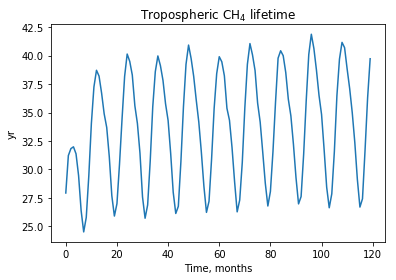

In [5]:
plt.plot((ch4_burden_trop/ch4_oh_trop).data/(60*60*24*30*12));
plt.title('Tropospheric $CH_4$ lifetime')
plt.xlabel('Time, months')
plt.ylabel('yr');
plt.savefig(path_to_figs / f'{exp}_ch4_lifetime_trop.png');

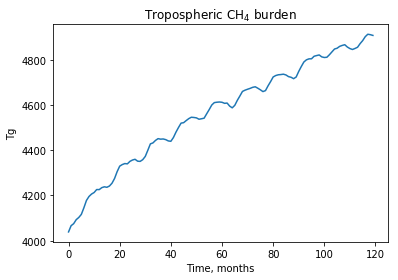

In [6]:
plt.plot(ch4_burden_trop.data/1e9);
plt.title('Tropospheric $CH_4$ burden')
plt.xlabel('Time, months')
plt.ylabel('Tg');
plt.savefig(path_to_figs / f'{exp}_ch4_burden_trop.png');

In [7]:
# Define polar regions
polar = iris.Constraint(latitude=lambda x: abs(x.point) > 70)

In [8]:
# Calculate tropospheric CH4 burden
ch4_burden_trop_polar = (ch4*air_mass*chem_trop_mask).extract(polar).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)
# Calculate CH4+OH flux in the troposphere
ch4_oh_trop_polar = (ch4_oh*ch4_molar_mass*1e-3*chem_trop_mask).extract(polar).collapsed(['longitude', 'latitude', 'level_height'], iris.analysis.SUM)

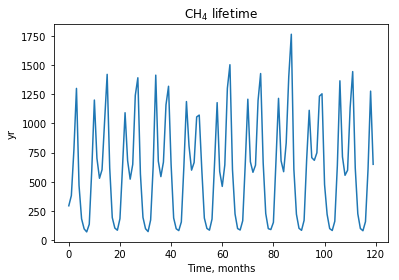

In [9]:
plt.plot((ch4_burden_trop_polar/ch4_oh_trop_polar).data/(60*60*24*30*12))
plt.title('$CH_4$ lifetime')
plt.xlabel('Time, months')
plt.ylabel('yr');